# Detection of Coronary Heart Disease
## By: Mason Nolan

---

Heart disease is the leading cause of death in the world, accounting for [31% of all deaths](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)), yet it is estimated that nearly [90%](https://www.ahajournals.org/doi/10.1161/CIRCULATIONAHA.107.717033) of cases are preventable. Hospitals have also become increasingly burdened with staff shortages, especially post-COVID, and need to appropriate their resources efficiently and quickly in order to handle their growing queue of patients. Another issue hospitals have to deal with is how to conduct proper triage; hospitals have to decide which patients should get priority for treatment based on the severity of the symptoms they are showing.

We will attempt to address all of these issues by designing machine learning models to identify cases of coronary heart disease from a list of symptoms and measurements of some criteria that we find in a patient. In doing so, if a model performs well, it may be used to diagnose patients quickly and efficiently and save hospitals on time and resources that may have been necessary to obtain such a diagnosis, or be used as an artifical second opinion. Our models may also provide insight into which symptoms are the strongest indicators of heart disease, which is useful information to know for a diagnositician, even if one of our models are not adopted.

Our dataset used to train our machine learning models will be a subset of a famous collection of hospital data from Cleveland, Long Beach, Hungary, and Switzerland taken in 1988. We will be looking at the patients from Cleveland. This dataset specifically investigates *coronary heart disease* (also called atherosclerotic heart disease or coronary artery disease (CAD)). This does not represent all heart disease, but coronary heart disease is the most common instance and represents [41.2% of heart disease cases](https://professional.heart.org/en/science-news/heart-disease-and-stroke-statistics-2023-update). This means our model may not be suitable for detecting more niche heart diseases.  

Since our dataset was published in 1988, this data may then be considered dated and needing of a modern update. Issues about the dataset's relevance may arrive due to demographic changes, medical advancements, and improvements in measurement precisions. There may also be common indicators of CAD that are not present in the dataset for some reason, such as body fat percentage or dyspnea. The features may have not been considered in the dataset because of low research into the relevance at the time, or perhaps these features ended up not having much importance when tested and were intentionally excluded.  

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np
heartraw = pd.read_csv('/content/drive/My Drive/R Data/Data/Heart.csv')
heartraw # Preview Data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [25]:
heartraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


Our dataset has a few missing values. Given the very low amount of missing values, we are not going to sacrifice data integrity by introducing synthetic data through means such as KNN, but instead we will just drop the limited few samples where we have missing values.

In [26]:
# Remove samples with NA values, since the number of them is low

heartdrop=heartraw.dropna()
heartdrop

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


The total amount of cases dropped was 6 out of 303 (1.98%). This should not impact our models to a large degree.

In [27]:
# Check for duplicate columns

heartdrop.duplicated().value_counts().to_string()

'False    297'

We see no duplicated cases, so all 297 remaining cases are unique and ready to be worked.

In [28]:
# Class imbalance check

print(heartdrop["AHD"].value_counts().to_string())

AHD
No     160
Yes    137


53.9% of patients have no heart disease, 46.1% have heart disease: there is no major class imbalance, so it is not needed to undersample or introduce synthetic cases to balance classes. This may be a coincidence, or it may have been a result of the original surveyors using disproportionate stratified sampling.

In [29]:
# Categorical columns

print(heartdrop["ChestPain"].value_counts().to_string(), "\n")
print(heartdrop["Sex"].value_counts().to_string(), "\n")
print(heartdrop["Fbs"].value_counts().to_string(), "\n")
print(heartdrop["RestECG"].value_counts().to_string(), "\n")
print(heartdrop["ExAng"].value_counts().to_string(), "\n")
print(heartdrop["Slope"].value_counts().to_string(), "\n")
print(heartdrop["Thal"].value_counts().to_string(), "\n")

ChestPain
asymptomatic    142
nonanginal       83
nontypical       49
typical          23 

Sex
1    201
0     96 

Fbs
0    254
1     43 

RestECG
0    147
2    146
1      4 

ExAng
0    200
1     97 

Slope
1    139
2    137
3     21 

Thal
normal        164
reversable    115
fixed          18 



Our categorical data is not particularly clean; the data is inconsistent with whether some categories are labelled or not, and some columns are label encoded rather than one-hot encoded, which may cause issues if our model utilizes the data. First, we will translate our columns, then one-hot encode.

Meanings:
* asymptomatic - no pain
* nonanginal - not related to heart blood flow
* nontypical - angina that either does not improve with rest/treatment, or does not worsen under stress
* typical - angina
* Sex=0 - Female
* Sex=1 - Male
* Fbs=1 - Blood sugar over 120mg/dL
* RestECG=0 - Normal
* RestECG=2 - Abnormal
* RectECG=1 - Abnormal, and indicative of left ventricle hypertrophy
* ExAng=1 - Exercise enduced angina present
* Slope=1 - Downsloping
* Slope=2 - Horizontal
* Slope=3 - Upsloping
* normal - Normal blood flow
* reversable - Abnormal blood flow
* fixed - No blood flow somewhere in the heart

We will briefly explain the categorical features.

Sex is simply male or female depending on what the patient was assigned at birth.

Chest pain is determined by the presence or absence of pain in the patient's upper body. If pain is present, it is also classified by whether or not it is an angina (dull, achy pain due to poor blood flow to the heart) or some other type of pain. If it is an angina, it is also noted if the angina is atypical (meaning it does not get better with rest or nitroglycerin, or does not get worse with stress or exercise).

Exercise-induced angina is labeled when the patient experiences angina-type chest pain after exercising. There is some obvious overlap with chest pain, since a patient experiencing chest pain in general will certainly continue to experience chest pain while exercising.

Fasting blood sugar is ordinarily a continuous variable, but it is only labeled here if the patient's measurements are above 120mg/dL. This is considered a diabetic level of blood sugar (modern standards consider 125+mg/dL diabetic, and 100-125mg/dL is considered pre-diabetic).

ECG (electrocardiogram) results are labeled for whether or not there is abnormal heart rhythm, or electric imbalances such as if their T wave is inverted. If either is true, the patient's ECG results are considered abnormal. Additionally, there is criteria that determines if the abnormality aligns with the presence of left ventricle hypertrophy. If that criteria is met, then it is labeled as such as well.

ST slope is a particular observation from the ECG, that determines if the slope during the pause between the S wave and the T wave is approximately horizontal (ideal), or positive (upwards) or downwards (negative).

Thallium cardiac stress test is done by injecting the patient with a radioactive tracer (typically thallium(I) chloride) is injected into the patient's bloodstream, then the patient is scanned after a brief period of time to see if the tracer is present throughout the patient's heart. The results are labelled "reversible" if there is low/unusual blood flow in the heart, indicating that their may be a way to correct the abnormality through treatment or lifestyle changes to improve blood flow. They are labeled "fixed" if there is no blood flow in some part of the heart, indicating permanent damage or blockage. *This feature was commonly incorrectly labeled as "thalassemia" in many other reports that have cited this dataset. Thalassemia is a genetic blood disease where your blood has a low amount of hemoglobin. While it may make sense that a blood disorder might affect one's heart, this is not what the original dataset was reporting. Thalassemia is an uncommon disorder present in [0.044% of the population](https://www.news-medical.net/health/Thalassemia-Prevalence.aspx), meanwhile, this feature is present in 44.8% of our sampled patients. Additionally, it would not make sense to categorize thalassemia as a "fixed defect" or "reversible defect", since it does not necessarily cause any defects and it is always reversible by a bone morrow transplant.*

Lastly, the target is coronary artery disease, and is labelled whether or not the patient exhibits it.


In [30]:
# Convert all categorical data with >2 categories and int/float data into readable data types before One-Hot encoding.
heartcat=heartdrop.copy()
heartcat["Slope"]=heartcat["Slope"].astype(str)
heartcat["RestECG"]=heartcat["RestECG"].astype(str)


# Label encode the columns with exactly 2 categories that have not already been encoded.
heartcat["AHD"]=heartcat["AHD"].replace("No", "0")
heartcat["AHD"]=heartcat["AHD"].replace("Yes", "1")
heartcat["AHD"]=heartcat["AHD"].astype(int)

# Drop unnecessary index column
heartcat=heartcat.drop(columns=["Unnamed: 0"])

# One-hot encoding
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], dtype=int)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

features_to_encode = ["ChestPain", "RestECG", "Slope", "Thal"]
heartonehot = heartcat.copy()

for feature in features_to_encode:
    heartonehot = encode_and_bind(heartonehot, feature)

# Improve column names
heartonehot=heartonehot.rename(columns={"RestBP": "Resting Systolic Blood Pressure", "Chol": "Cholesterol", "Fbs": "Critical FBS Level", "ExAng": "Exercise-enduced Angina", "MaxHR": "Maximum Heart Rate",
                                        "Oldpeak": "ST Depression Change After Exercise", "Ca": "# of Major Vessels Colored During Fluoroscopy", "ChestPain_asymptomatic": "No Chest Pain",
                                        "ChestPain_nonanginal": "Generic Chest Pain", "ChestPain_nontypical": "Nontypical Angina", "ChestPain_typical": "Typical Angina", "RestECG_0": "Normal ECG",
                                        "RestECG_1": "Abnormal ECG with LVH", "RestECG_2": "Abnormal ECG without LVH", "Slope_1": "Downsloping ST", "Slope_2": "Horizontal ST", "Slope_3": "Upsloping ST",
                                        "Thal_fixed": "Abnormal Blood Flow Perpetually", "Thal_normal": "Normal Blood Flow", "Thal_reversable": "Abnormal Blood Flow Only While Stressed", "AHD": "Coronary Heart Disease"})

heart=heartonehot.astype(float)
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            297 non-null    float64
 1   Sex                                            297 non-null    float64
 2   Resting Systolic Blood Pressure                297 non-null    float64
 3   Cholesterol                                    297 non-null    float64
 4   Critical FBS Level                             297 non-null    float64
 5   Maximum Heart Rate                             297 non-null    float64
 6   Exercise-enduced Angina                        297 non-null    float64
 7   ST Depression Change After Exercise            297 non-null    float64
 8   # of Major Vessels Colored During Fluoroscopy  297 non-null    float64
 9   Coronary Heart Disease                         297 non-null

We now have all of our features and target given readable names, numeric data types, and mutually exclusive columns for categorical data with more than 2 possible labels.

We then check the distributions of our non-categorical data:

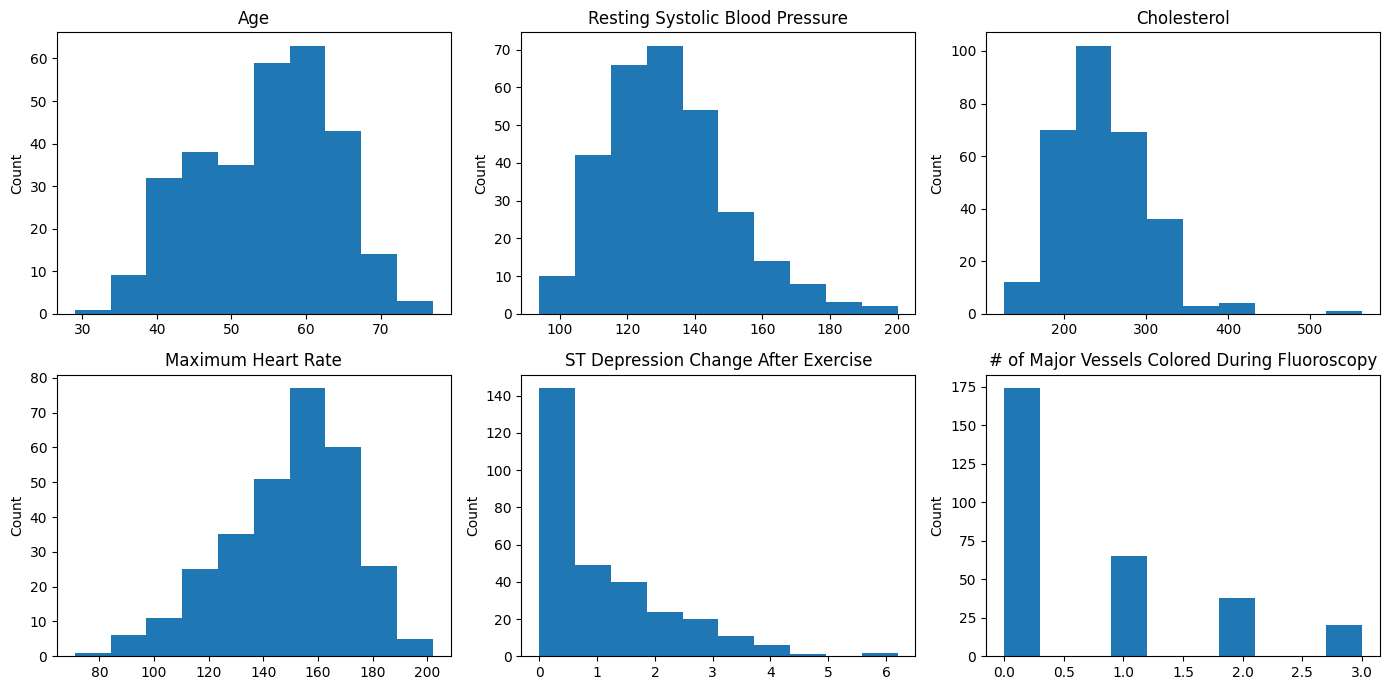

In [31]:
import matplotlib.pyplot as plt

# Plot numeric data distributions
NumericData = ["Age", "Resting Systolic Blood Pressure", "Cholesterol", "Maximum Heart Rate", "ST Depression Change After Exercise", "# of Major Vessels Colored During Fluoroscopy"]
fig, axes = plt.subplots(2, 3, figsize=(14, 7))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.title(NumericData[i])
    plt.ylabel("Count")
    plt.hist(heart[NumericData[i]])
    plt.tight_layout()

Some distributions do not appear likely to come from a normal distribution or approximate a normal distribution. For this reason, when we build our models, will use MinMaxScaler rather than StandardScaler. StandardScaler assumes that our distributions come from normal distributions. MinMaxScaler does not, however MinMaxScaler is less robust to outliers impacting its scaling. From the look of our distributions, this does not appear to be a significant problem, as distant outliers only seem noteworthy in the "Cholesterol" and "ST Depression Change After Exercise" columns. We may see more detail with the boxplots of our numeric data.

/tmp/ipython-input-3453842269.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X[NumericData], labels=X[NumericData].columns, vert=False, patch_artist=True)


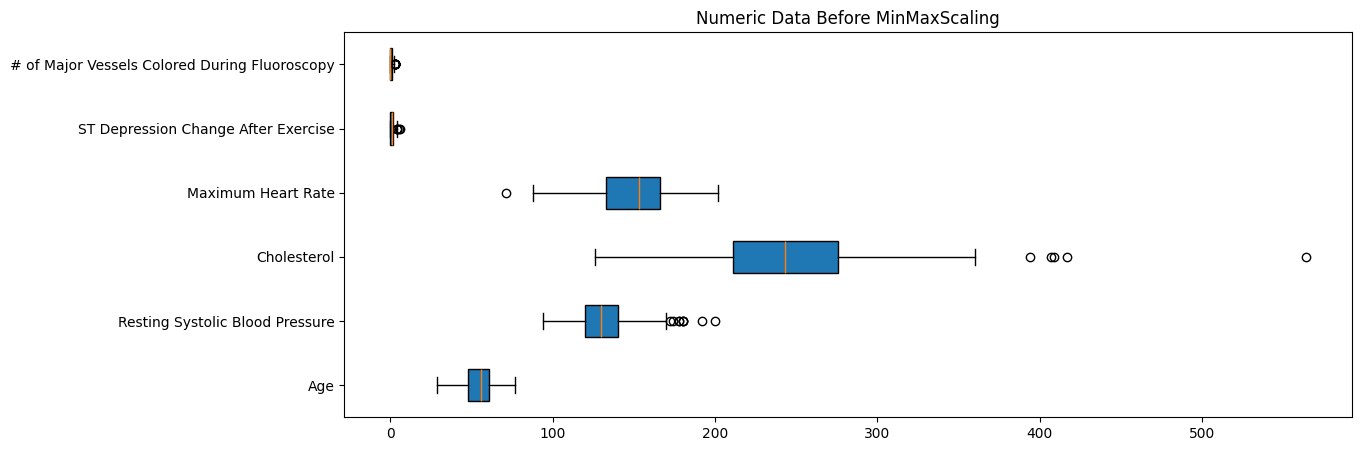

/tmp/ipython-input-3453842269.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(heart_scaled_num_df, labels=X[NumericData].columns, vert=False, patch_artist=True)


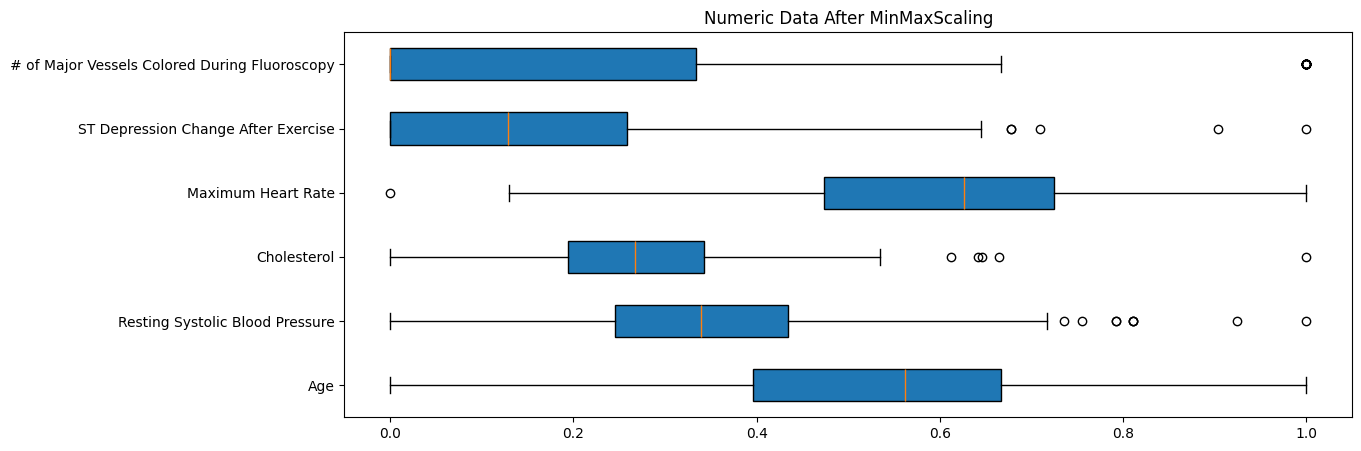

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Split dataset into features dataframe and column vector
X = heart.drop(["Coronary Heart Disease"], axis=1)
y = heart["Coronary Heart Disease"]

scaler = MinMaxScaler()
heart_scaled = scaler.fit_transform(X)
heart_scaled_df = pd.DataFrame(heart_scaled, index=X.index, columns=X.columns)
heart_scaled_num = scaler.fit_transform(X[NumericData])
heart_scaled_num_df = pd.DataFrame(heart_scaled_num, index=X[NumericData].index, columns=X[NumericData].columns)

plt.figure(figsize =(13, 5))
plt.title("Numeric Data Before MinMaxScaling")
plt.boxplot(X[NumericData], labels=X[NumericData].columns, vert=False, patch_artist=True)
plt.show()
print("\n")
plt.figure(figsize =(13, 5))
plt.title("Numeric Data After MinMaxScaling")
plt.boxplot(heart_scaled_num_df, labels=X[NumericData].columns, vert=False, patch_artist=True)
plt.show()

Box plots of categorical data do not make much sense to plot since they only take on values 0 and 1, so our boxplot would just say the entire distribution lies in $[0,1]$, or says the entire distribution is centered on $0$ or $1$ with the other points on the opposite label considered outliers.

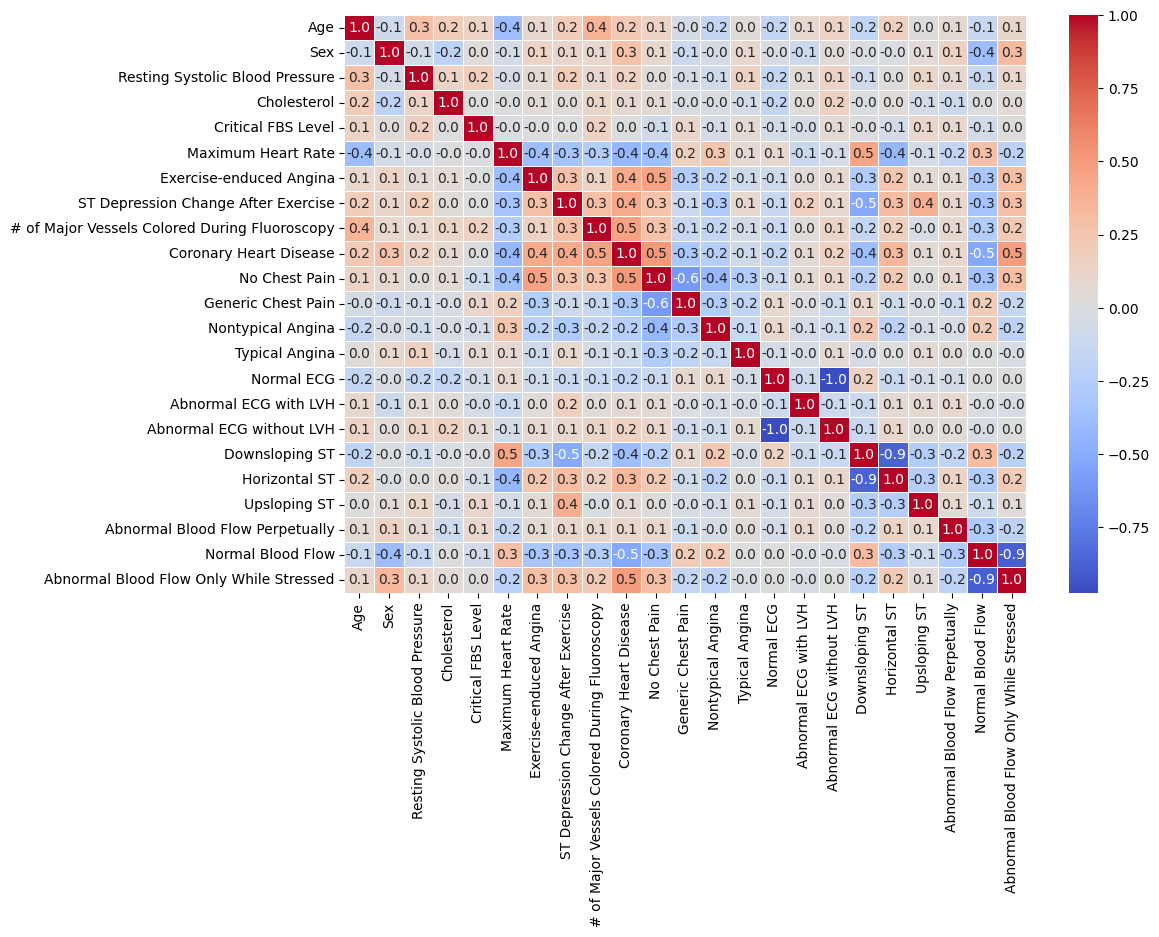

In [33]:
# Correlation Matrix

import seaborn as sns
plt.figure(figsize=(11,7.5))
sns.heatmap(heart.corr(), annot=True, linewidths=.5, fmt= '.1f', cmap="coolwarm")
plt.show()

There is no extremely notable correlation between features, other than some cases of strong correlation between one-hot encoded columns (which makes sense, since one-hot encoded columns of a feature must be complementary. We would expect more strong negative correlations if we had a larger sample size).

Now that our features are scaled (note: a neat part about MinMaxScaling is that categorical data remains equal to $0$ or $1$ after scaling), we can start building our models. Our choices of models we will use are either going to be indifferent to scaling, or require scaling, so none of our models' performances should be damaged by the scaling. Principal component analysis (PCA) also requires scaling.

We will perform PCA on our features, but we will still build our models both with and without our PCA transformed data for investigative purposes.

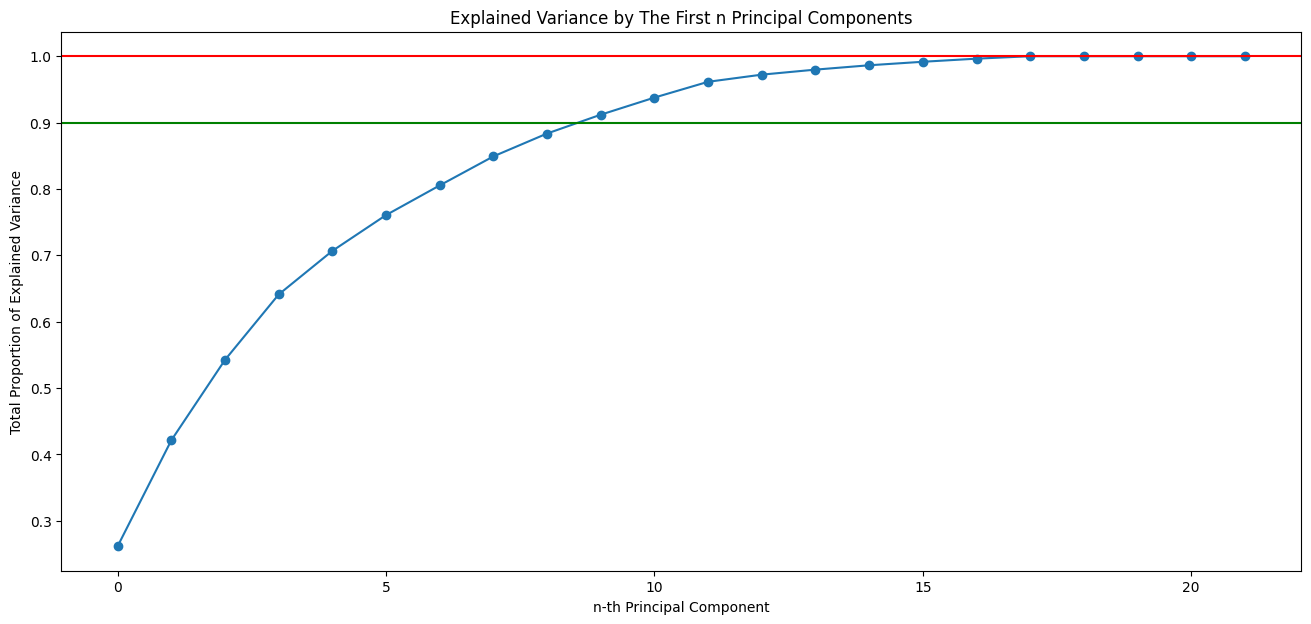

In [34]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(heart_scaled_df)

# Visualize PCA variance to decide an ideal number of components
plt.figure(figsize=(16,7))
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
# plt.xticks(np.arange(len(explained_variance_ratio)), np.arange(1, len(explained_variance_ratio)+1)) # index shift by 1
plt.xlabel('n-th Principal Component')
plt.ylabel('Total Proportion of Explained Variance')
plt.title('Explained Variance by The First n Principal Components')
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=0.90, color='g', linestyle='-') # Cutoff line where 95% of the explained variance is covered by our PCA components
plt.show()

10 components explain over 90% of the data (92%), which is a reasonable combination of noise reduction and dimensionality reduction versus keeping explained variance.

In [35]:
# Maintain future PCA using only 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(heart_scaled_df)

In [36]:
# Train/test splits for both PCA and non-PCA data, splitting the same way via equal random_state
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024, stratify=y)
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y, test_size=0.25, random_state=2024, stratify=y)


# Scale the data for our models
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Xpca_train = scaler.fit_transform(Xpca_train)
Xpca_test = scaler.transform(Xpca_test)

The classifier models we will be using are:


*   Logistic Regression
*   Gaussian Naive Bayes
*   K-Nearest Neighbors
*   Decision Tree
*   Random Forest
*   Neural Network

We will investigate each model's performance using their typical metrics: accuracy, precision, recall, and F1-score. Recall is going to be considered the most important metric, since we do not want to fail to detect a patient with heart disease, which could cause the patient to not receive proper treatment or begin lifestyle changes before their disease worsens.

We will start with Logistic Regression:

Without PCA: 

Logistic Regression Confusion Matrix:
[[31  9]
 [ 7 28]]
Logistic Regression Accuracy: 0.7866666666666666
Logistic Regression Precision: 0.7567567567567568
Logistic Regression Recall: 0.8
Logistic Regression F1-score: 0.7777777777777778


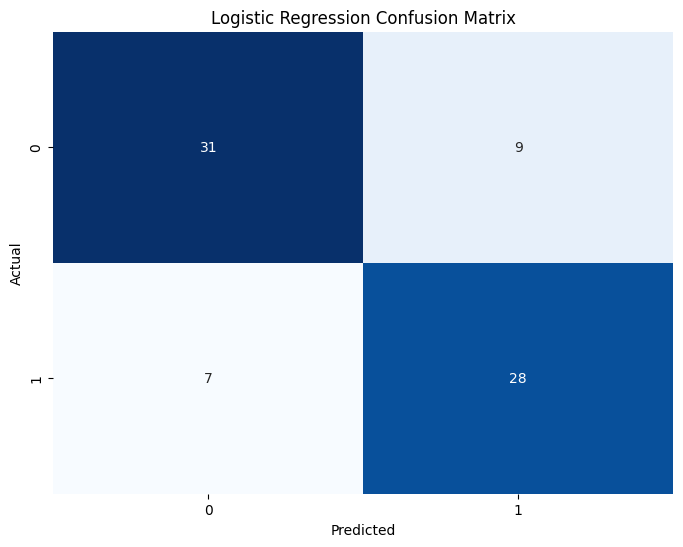


--------------------------------------------------------------------------------------

With PCA (10 components): 

Logistic Regression Confusion Matrix:
[[32  8]
 [ 6 29]]
Logistic Regression Accuracy: 0.8133333333333334
Logistic Regression Precision: 0.7837837837837838
Logistic Regression Recall: 0.8285714285714286
Logistic Regression F1-score: 0.8055555555555556


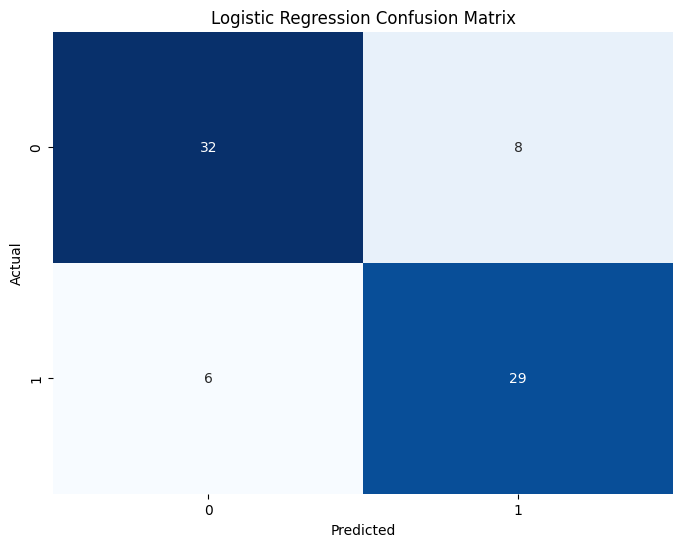

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

print("Without PCA: \n")

# Initialize the classifier (Logistic Regression)
clf_lr = LogisticRegression(random_state=42)

# Train the classifier
clf_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = clf_lr.predict(X_test)

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Calculate accuracy metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Confusion Matrix:")
print(cm_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-score:", f1_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Repeat process with PCA data ---------------------------------------------------------
print("\n--------------------------------------------------------------------------------------\n")
print("With PCA (10 components): \n")

# Train the classifier
clf_lr.fit(Xpca_train, ypca_train)

# Make predictions on the test set
ypca_pred_lr = clf_lr.predict(Xpca_test)

# Generate confusion matrix
cm_lr = confusion_matrix(ypca_test, ypca_pred_lr)

# Calculate accuracy metrics
accuracy_lr = accuracy_score(ypca_test, ypca_pred_lr)
precision_lr = precision_score(ypca_test, ypca_pred_lr)
recall_lr = recall_score(ypca_test, ypca_pred_lr)
f1_lr = f1_score(ypca_test, ypca_pred_lr)

print("Logistic Regression Confusion Matrix:")
print(cm_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-score:", f1_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

There were no significant hyperparameters to tune for logistic regression. Some options include handling class imbalance (not necessary since our classes were nearly balanced), multi-class handling (not necessary since our classifier is binary), tolerance and maximum iterations (did not make a difference since our dataset was small), the solver ("liblinear" was considered since our dataset is small, the target is binary, and it may improve computational efficiency, but ultimately the models performance did not change). No loss penalty was necessary either.

Now Gaussian Naive Bayes:

Without PCA: 

Gaussian Naive Bayes Confusion Matrix:
[[31  9]
 [ 5 30]]
Gaussian Naive Bayes Accuracy: 0.8133333333333334
Gaussian Naive Bayes Precision: 0.7692307692307693
Gaussian Naive Bayes Recall: 0.8571428571428571
Gaussian Naive Bayes F1-score: 0.8108108108108109


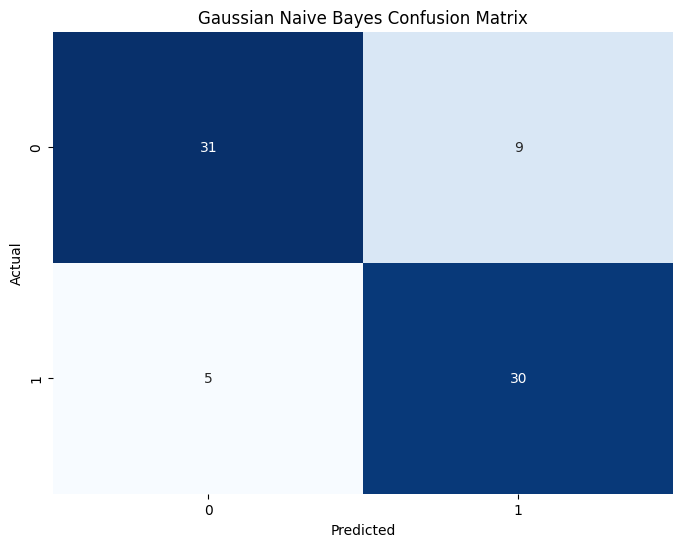


--------------------------------------------------------------------------------------

With PCA (10 components): 

Gaussian Naive Bayes Confusion Matrix:
[[31  9]
 [ 7 28]]
Gaussian Naive Bayes Accuracy: 0.7866666666666666
Gaussian Naive Bayes Precision: 0.7567567567567568
Gaussian Naive Bayes Recall: 0.8
Gaussian Naive Bayes F1-score: 0.7777777777777778


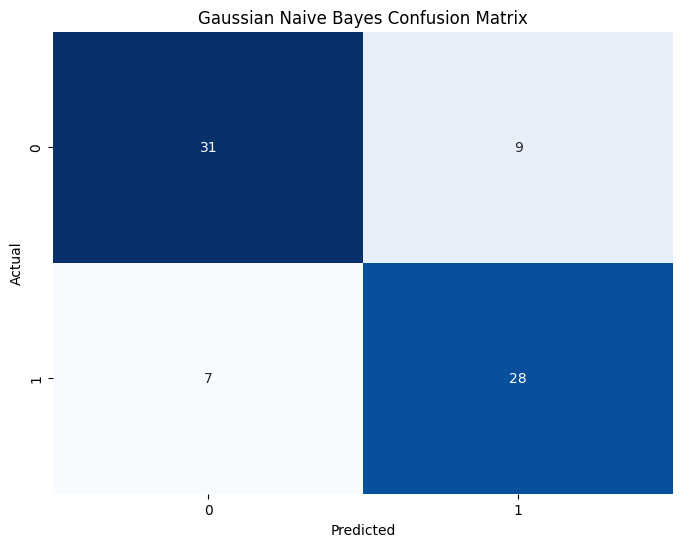

In [38]:
print("Without PCA: \n")

# Initialize the classifier (Gaussian Naive Bayes)
clf_nb = GaussianNB()

# Train the classifier
clf_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = clf_nb.predict(X_test)

# Generate confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Calculate accuracy metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Gaussian Naive Bayes Confusion Matrix:")
print(cm_nb)
print("Gaussian Naive Bayes Accuracy:", accuracy_nb)
print("Gaussian Naive Bayes Precision:", precision_nb)
print("Gaussian Naive Bayes Recall:", recall_nb)
print("Gaussian Naive Bayes F1-score:", f1_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Repeat process with PCA data ---------------------------------------------------------
print("\n--------------------------------------------------------------------------------------\n")
print("With PCA (10 components): \n")

# Train the classifier
clf_nb.fit(Xpca_train, ypca_train)

# Make predictions on the test set
ypca_pred_nb = clf_nb.predict(Xpca_test)

# Generate confusion matrix
cm_nb = confusion_matrix(ypca_test, ypca_pred_nb)

# Calculate accuracy metrics
accuracy_nb = accuracy_score(ypca_test, ypca_pred_nb)
precision_nb = precision_score(ypca_test, ypca_pred_nb)
recall_nb = recall_score(ypca_test, ypca_pred_nb)
f1_nb = f1_score(ypca_test, ypca_pred_nb)

print("Gaussian Naive Bayes Confusion Matrix:")
print(cm_nb)
print("Gaussian Naive Bayes Accuracy:", accuracy_nb)
print("Gaussian Naive Bayes Precision:", precision_nb)
print("Gaussian Naive Bayes Recall:", recall_nb)
print("Gaussian Naive Bayes F1-score:", f1_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The only real hyperparameter is a Naive Bayes model is priors, but we do not know any priors without having done deep research into cardiology, so these priors were left to be calculated by default.

Before building our K-Nearest Neighbor model, we will have to decide what value K should be, our most important hyperparameter. We will use K-fold validation to see what value of K should give us the best performance and most consistent results. Of our possible choices of K, we limit the options to odd numbers are ideal to avoid ties, and we do not go above K=20 since relatively large K values imply underfitting.

In [39]:
from sklearn.model_selection import cross_val_score

# k-fold cross validations (5 folds)

i_values = [3,5,7,9,11,13,15,17,19]
scores = []

for i in i_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    cvscores = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(cvscores.mean())

print("Best performing KNN number of neighbors =", i_values[scores.index(max(scores))])

Best performing KNN number of neighbors = 13


Without PCA: 

K-Nearest Neighbors Confusion Matrix:
[[31  9]
 [ 8 27]]
K-Nearest Neighbors Accuracy: 0.7733333333333333
K-Nearest Neighbors Precision: 0.75
K-Nearest Neighbors Recall: 0.7714285714285715
K-Nearest Neighbors F1-score: 0.7605633802816901


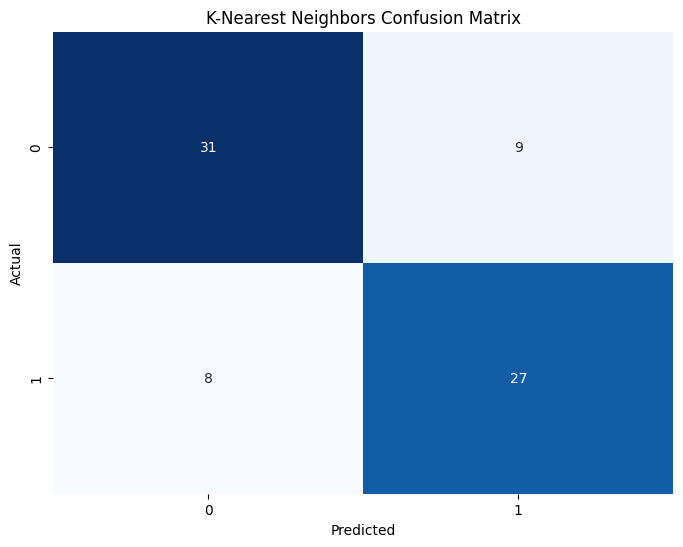


--------------------------------------------------------------------------------------

With PCA (10 components): 

K-Nearest Neighbors Confusion Matrix:
[[31  9]
 [ 7 28]]
K-Nearest Neighbors Accuracy: 0.7866666666666666
K-Nearest Neighbors Precision: 0.7567567567567568
K-Nearest Neighbors Recall: 0.8
K-Nearest Neighbors F1-score: 0.7777777777777778


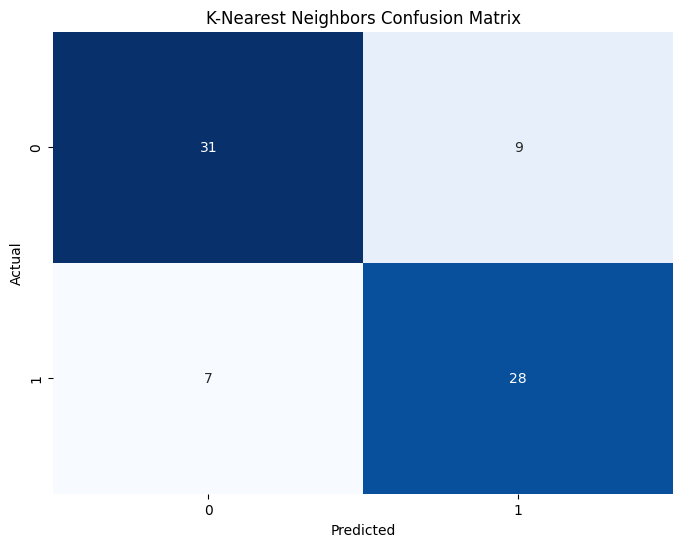

In [40]:
print("Without PCA: \n")

# Initialize the classifier (K-Nearest Neighbors)
clf_knn = KNeighborsClassifier(n_neighbors=13)

# Train the classifier
clf_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = clf_knn.predict(X_test)

# Generate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Calculate accuracy metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Confusion Matrix:")
print(cm_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("K-Nearest Neighbors Precision:", precision_knn)
print("K-Nearest Neighbors Recall:", recall_knn)
print("K-Nearest Neighbors F1-score:", f1_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Repeat process with PCA data ---------------------------------------------------------
print("\n--------------------------------------------------------------------------------------\n")
print("With PCA (10 components): \n")

# Train the classifier
clf_knn.fit(Xpca_train, ypca_train)

# Make predictions on the test set
ypca_pred_knn = clf_knn.predict(Xpca_test)

# Generate confusion matrix
cm_knn = confusion_matrix(ypca_test, ypca_pred_knn)

# Calculate accuracy metrics
accuracy_knn = accuracy_score(ypca_test, ypca_pred_knn)
precision_knn = precision_score(ypca_test, ypca_pred_knn)
recall_knn = recall_score(ypca_test, ypca_pred_knn)
f1_knn = f1_score(ypca_test, ypca_pred_knn)

print("K-Nearest Neighbors Confusion Matrix:")
print(cm_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("K-Nearest Neighbors Precision:", precision_knn)
print("K-Nearest Neighbors Recall:", recall_knn)
print("K-Nearest Neighbors F1-score:", f1_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Other hyperparameters we could tune are weight (which would require more research about cardiology, similar to priors in Naive Bayes), and metric, which we have no obvious reason to change.

Now we can build a Decision Tree:

Without PCA: 

Decision Tree Confusion Matrix:
[[26 14]
 [ 9 26]]
Decision Tree Accuracy: 0.6933333333333334
Decision Tree Precision: 0.65
Decision Tree Recall: 0.7428571428571429
Decision Tree F1-score: 0.6933333333333334


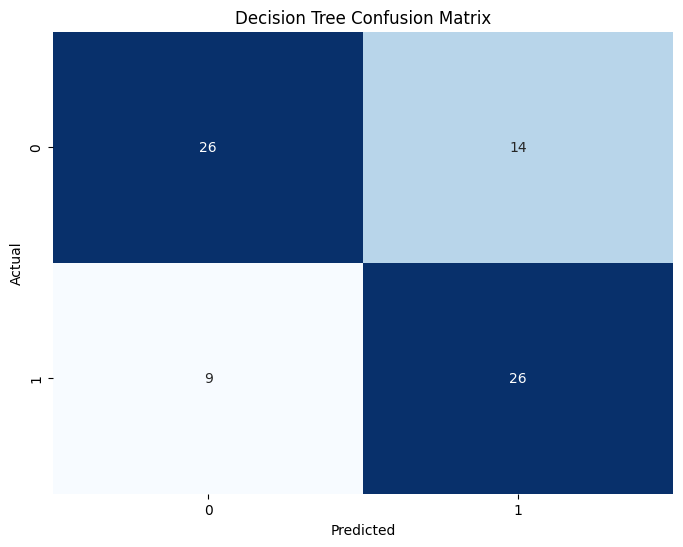


--------------------------------------------------------------------------------------

With PCA (10 components): 

Decision Tree Confusion Matrix:
[[24 16]
 [ 8 27]]
Decision Tree Accuracy: 0.68
Decision Tree Precision: 0.627906976744186
Decision Tree Recall: 0.7714285714285715
Decision Tree F1-score: 0.6923076923076923


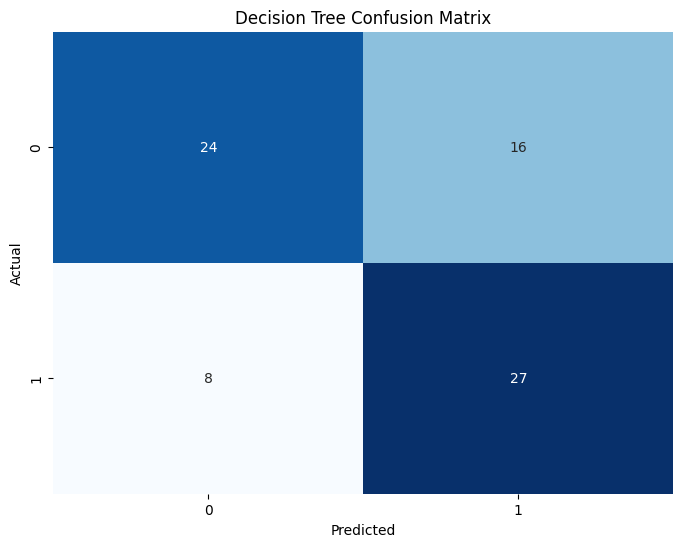

In [41]:
print("Without PCA: \n")

# Initialize the classifier (Decision Tree)
clf_dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = clf_dt.predict(X_test)

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate accuracy metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Confusion Matrix:")
print(cm_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1-score:", f1_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Repeat process with PCA data ---------------------------------------------------------
print("\n--------------------------------------------------------------------------------------\n")
print("With PCA (10 components): \n")

# Train the classifier
clf_dt.fit(Xpca_train, ypca_train)

# Make predictions on the test set
ypca_pred_dt = clf_dt.predict(Xpca_test)

# Generate confusion matrix
cm_dt = confusion_matrix(ypca_test, ypca_pred_dt)

# Calculate accuracy metrics
accuracy_dt = accuracy_score(ypca_test, ypca_pred_dt)
precision_dt = precision_score(ypca_test, ypca_pred_dt)
recall_dt = recall_score(ypca_test, ypca_pred_dt)
f1_dt = f1_score(ypca_test, ypca_pred_dt)

print("Decision Tree Confusion Matrix:")
print(cm_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1-score:", f1_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Hyper parameter tuning for a decision tree often only served to underfit. Options included limiting the maximum depth of the tree, the minimum number of samples required to make a split, and limiting the number of leaves. All of these parameters only made our model simpler and they ended up performing worse or the same.

Then we can do our Random Forest:

Without PCA: 

Random Forest Confusion Matrix:
[[31  9]
 [ 7 28]]
Random Forest Accuracy: 0.7866666666666666
Random Forest Precision: 0.7567567567567568
Random Forest Recall: 0.8
Random Forest F1-score: 0.7777777777777778


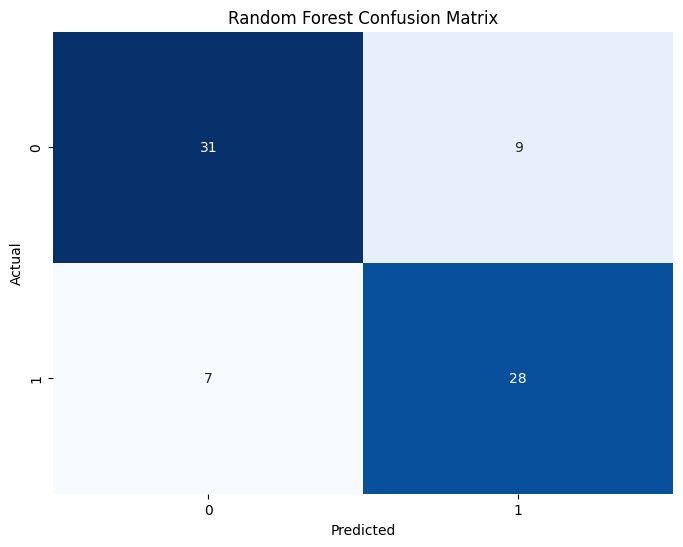


--------------------------------------------------------------------------------------

With PCA (10 components): 

Random Forest Confusion Matrix:
[[28 12]
 [ 9 26]]
Random Forest Accuracy: 0.72
Random Forest Precision: 0.6842105263157895
Random Forest Recall: 0.7428571428571429
Random Forest F1-score: 0.7123287671232876


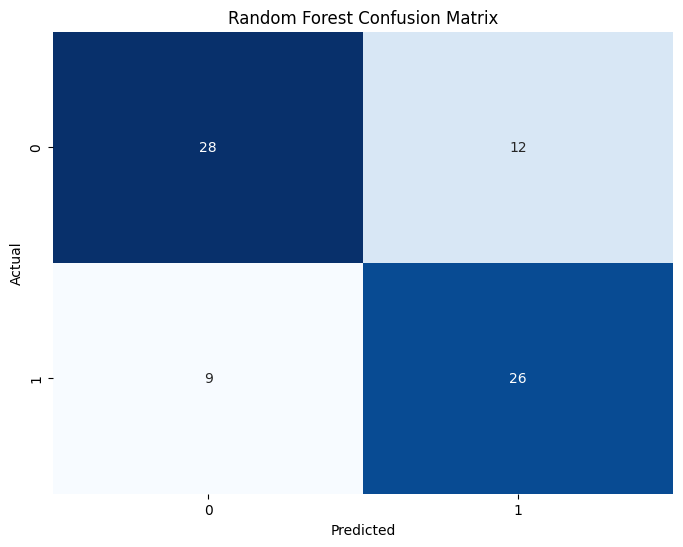

In [42]:
print("Without PCA: \n")

# Initialize the classifier (Random Forest)
clf_randfor = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, random_state=42)

# Train the classifier
clf_randfor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_randfor = clf_randfor.predict(X_test)

# Generate confusion matrix
cm_randfor = confusion_matrix(y_test, y_pred_randfor)

# Calculate accuracy metrics
accuracy_randfor = accuracy_score(y_test, y_pred_randfor)
precision_randfor = precision_score(y_test, y_pred_randfor)
recall_randfor = recall_score(y_test, y_pred_randfor)
f1_randfor = f1_score(y_test, y_pred_randfor)

print("Random Forest Confusion Matrix:")
print(cm_randfor)
print("Random Forest Accuracy:", accuracy_randfor)
print("Random Forest Precision:", precision_randfor)
print("Random Forest Recall:", recall_randfor)
print("Random Forest F1-score:", f1_randfor)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_randfor, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Repeat process with PCA data ---------------------------------------------------------
print("\n--------------------------------------------------------------------------------------\n")
print("With PCA (10 components): \n")

# Train the classifier
clf_randfor.fit(Xpca_train, ypca_train)

# Make predictions on the test set
ypca_pred_randfor = clf_randfor.predict(Xpca_test)

# Generate confusion matrix
cm_randfor = confusion_matrix(ypca_test, ypca_pred_randfor)

# Calculate accuracy metrics
accuracy_randfor = accuracy_score(ypca_test, ypca_pred_randfor)
precision_randfor = precision_score(ypca_test, ypca_pred_randfor)
recall_randfor = recall_score(ypca_test, ypca_pred_randfor)
f1_randfor = f1_score(ypca_test, ypca_pred_randfor)

print("Random Forest Confusion Matrix:")
print(cm_randfor)
print("Random Forest Accuracy:", accuracy_randfor)
print("Random Forest Precision:", precision_randfor)
print("Random Forest Recall:", recall_randfor)
print("Random Forest F1-score:", f1_randfor)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_randfor, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random forest has the same hyperparameters, plus an additional one for the number of trees we choose to use during the ensemble learning. Very small amounts of decision trees (2 to 30) did make our model worse, performing similar to a single tree. Larger amounts of trees made our model perform better, yet very large numbers of trees (200+) did not improve our model, indicating that our performance stabilizes after some value of estimators and adding more trees did nothing but make our code longer to run.

We will now begin designing a neural network. This will require the most tuning, since a neural network can vary in so many different ways depending on our choice of number of layers and nodes, before we even consider tuning other hyperparameters.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,009 (3.94 KB)

 Trainable params: 1,009 (3.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4720 - loss: 0.8451 - val_accuracy: 0.6071 - val_loss: 0.7841
Epoch 2/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6317 - loss: 0.7785 - val_accuracy: 0.6607 - val_loss: 0.7544
Epoch 3/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6283 - loss: 0.7646 - val_accuracy: 0.7321 - val_loss: 0.7238
Epoch 4/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6608 - loss: 0.7266 - val_accuracy: 0.8214 - val_loss: 0.6923
Epoch 5/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7217 - loss: 0.6881 - val_accuracy: 0.8214 - val_loss: 0.6600
Epoch 6/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8135 - loss: 0.6387 - val_accuracy: 0.7679 - val_loss: 0.6241
Epoch 7/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7915 - loss: 0.6382 - val_accuracy: 0.7857 - val_loss: 0.5938
Epoch 8/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7755 - loss: 0.5719 - val_accuracy: 0.7857 - val_loss

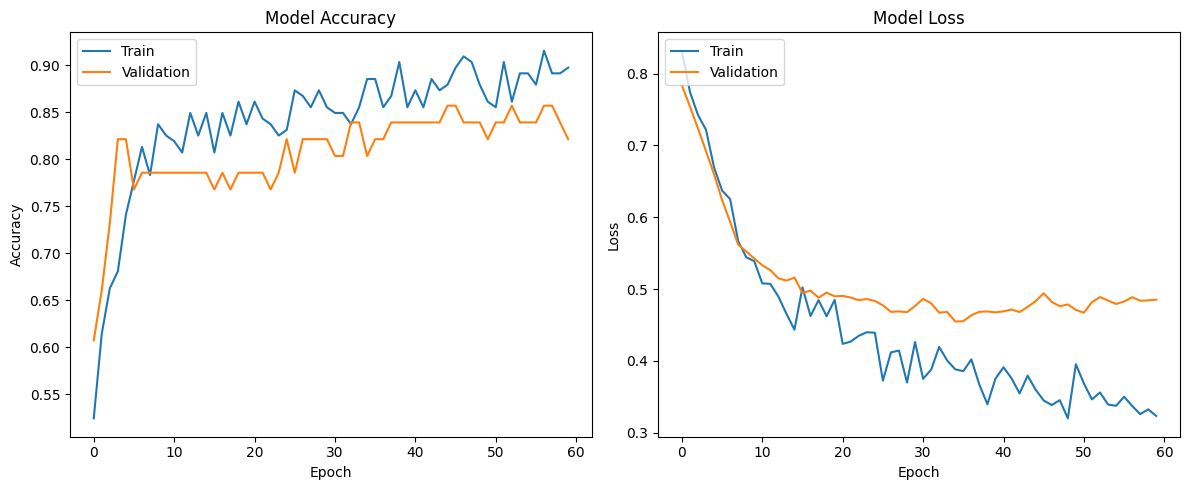

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report

model = Sequential([
    Dense(32, input_dim=22, activation='relu', kernel_regularizer=l2(0.0001)),  # Adding L2 regularization
    Dropout(0.5),  # Dropout 50% of the nodes
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),                # Adding L2 regularization
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary to get the number of parameters
model.summary()

# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=60, batch_size=8, validation_split=0.25, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predicting using the test set
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

# Analysis
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


> "Keep it simple, stupid!"

Given that our dataset size is not enormous, we designed our model so that it was not unnecessary complex. It would neither be efficient or logical for a dataset with 22 features and 297 samples to have a dozen hidden layers each with 64+ nodes. We started fairly complex and begin to cut layers and half the amount of nodes in various layers. Ultimately, we ended up on a network with only 2 hidden layers and a reasonably small amount of nodes (giving a total of 1009 total parameters). This demonstrated overfitting in our model loss graph, so we implemented both dropout and L2 regularization (applying only one alone did not seem to work, even as their parameters were varied). This improved the overfitting issue, though there is still a minor amount present visible in the model accuracy graph, where the model accuracy on training data bounces around 85-90%, while the model accuracy on test data is closer to 82-85%.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4223 - loss: 0.7178 - val_accuracy: 0.5179 - val_loss: 0.6884
Epoch 2/125
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4752 - loss: 0.7087 - val_accuracy: 0.6250 - val_loss: 0.6875
Epoch 3/125
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4024 - loss: 0.7165 - val_accuracy: 0.6429 - val_loss: 0.6858
Epoch 4/125
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5177 - loss: 0.6895 - val_accuracy: 0.6607 - val_loss: 0.6838
Epoch 5/125
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5688 - loss: 0.6898 - val_accuracy: 0.7500 - val_loss: 0.6781
Epoch 6/125
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5327 - loss: 0.6932 - val_accuracy: 0.7500 - val_loss: 0.6741
Epoch 7/125
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5912 - loss: 0.6765 - val_accuracy: 0.7500 - val_loss: 0.6679
Epoch 8/125
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6078 - loss: 0.6743 - val_accuracy: 0.7500 

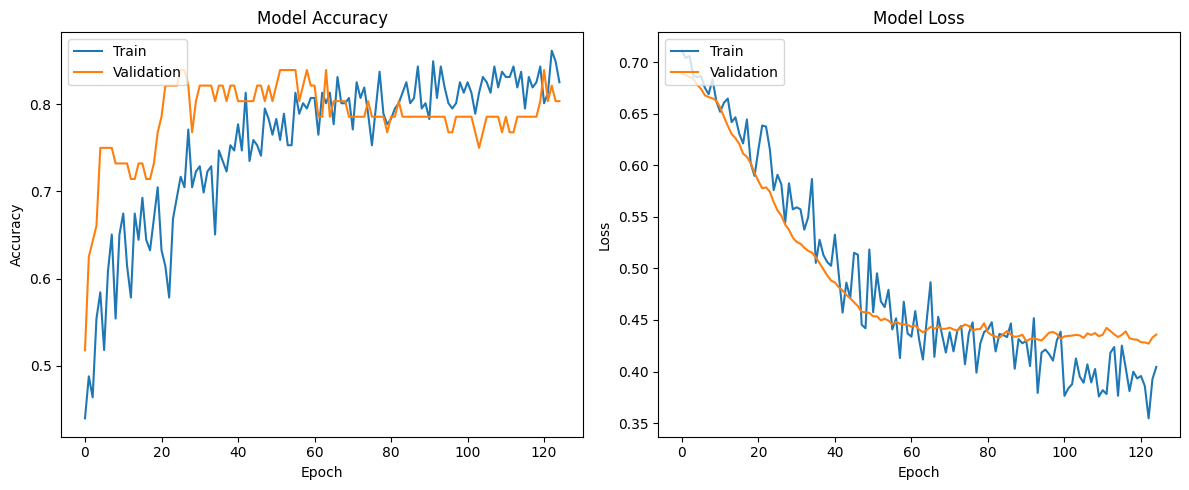

In [44]:
model = Sequential([
    Dense(16, input_dim=10, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary to get the number of parameters
model.summary()

# Fit the model on the training data
history = model.fit(Xpca_train, ypca_train, epochs=125, batch_size=8, validation_split=0.25, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(Xpca_test, ypca_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predicting using the test set
predictions = model.predict(Xpca_test)
predictions = (predictions > 0.5).astype(int)

# Analysis
print(classification_report(ypca_test, predictions))
print(confusion_matrix(ypca_test, predictions))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


We had to use a different neural network structure since our input layer with PCA shrunk to only 10 nodes from 22. Our original model structure was then unnecessarily complex. We adjusted the first hidden layer from 32 nodes to 16 nodes, and our accuracy improved (321 parameters). Our loss graph was exhibiting poor fitting again, indicating that the PCA may have accounted for some of the overfitting and some of our safety nets were now unnecessary. We dropped L2 regularization and the model loss graph appeared more reasonable. We should note that our amount of epochs necessary before the model accuracy began to stablize increased. This may be due to the fact that our model has significantly less parameters, and may improve less per epoch since there is less information to adjust.

Applying PCA slightly reduced average model accuracy, but showed less signs of overfitting. This may be explained by not enough PCA components since we are using a predictive model.

Ultimately, a Neural Network without applying PCA gave the best results across all metrics for our classification models. We are going to consider this our choice of option for our problem. Since a Neural Network is a "black-box" model, meaning we cannot effectively look inside after the model has been constructed to see why the model made the decisions its made and what features are most relevant to it, we will have to acquire information about our model in another way.

One option we can use to determine feature importance for our model is called "permutation feature importance". The values of a feature across all samples are shuffled, then our model is ran again and the degree our model accuracy is impaired is measured. We repeat the process for many shuffles, then the average the degree of model impairment is our simulated feature importance. We then normalize all of the feature importances so that they sum to 1.

In [45]:
from sklearn.inspection import permutation_importance

# We initialize our neural network model again WITHOUT PCA.

model = Sequential([
    Dense(32, input_dim=22, activation='relu', kernel_regularizer=l2(0.0001)),  # Adding L2 regularization
    Dropout(0.5),  # Dropout 50% of the nodes
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),                # Adding L2 regularization
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary to get the number of parameters
model.summary()

history = model.fit(X_train, y_train, epochs=60, batch_size=8, validation_split=0.25, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,009 (3.94 KB)

 Trainable params: 1,009 (3.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4470 - loss: 0.8716 - val_accuracy: 0.5536 - val_loss: 0.8044
Epoch 2/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4501 - loss: 0.8267 - val_accuracy: 0.7143 - val_loss: 0.7715
Epoch 3/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5412 - loss: 0.8053 - val_accuracy: 0.7500 - val_loss: 0.7426
Epoch 4/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6748 - loss: 0.7242 - val_accuracy: 0.8393 - val_loss: 0.7132
Epoch 5/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7314 - loss: 0.6962 - val_accuracy: 0.8393 - val_loss: 0.6857
Epoch 6/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7603 - loss: 0.7098 - val_accuracy: 0.8571 - val_loss: 0.6616
Epoch 7/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6809 - loss: 0.6796 - val_accuracy: 0.8571 - val_loss: 0.6366
Epoch 8/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8312 - loss: 0.6201 - val_accuracy: 0.8571 - val_loss

In [46]:
from sklearn.metrics import make_scorer

# This scorer function will output the percentage of correct predictions that still equal their true value after we shuffle our features later
def binary_accuracy(y_true, y_pred_prob):
    if y_pred_prob.shape[1] == 2:
        y_pred_prob = y_pred_prob[:, 1]

    y_pred_prob = y_pred_prob.flatten()

    y_pred = (y_pred_prob > 0.5).astype(int)

    accuracy = np.mean(y_true == y_pred)
    return accuracy

# Create a custom scorer using the binary_accuracy function
custom_scorer = make_scorer(binary_accuracy)

results = permutation_importance(estimator=model, X=X_test, y=y_test, n_repeats=50, random_state=42, scoring=custom_scorer)
feature_importances = results.importances_mean

for i, importance in enumerate(feature_importances):
  print(f"Feature {X.columns[i]}: {importance*100:.4f}%")

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━

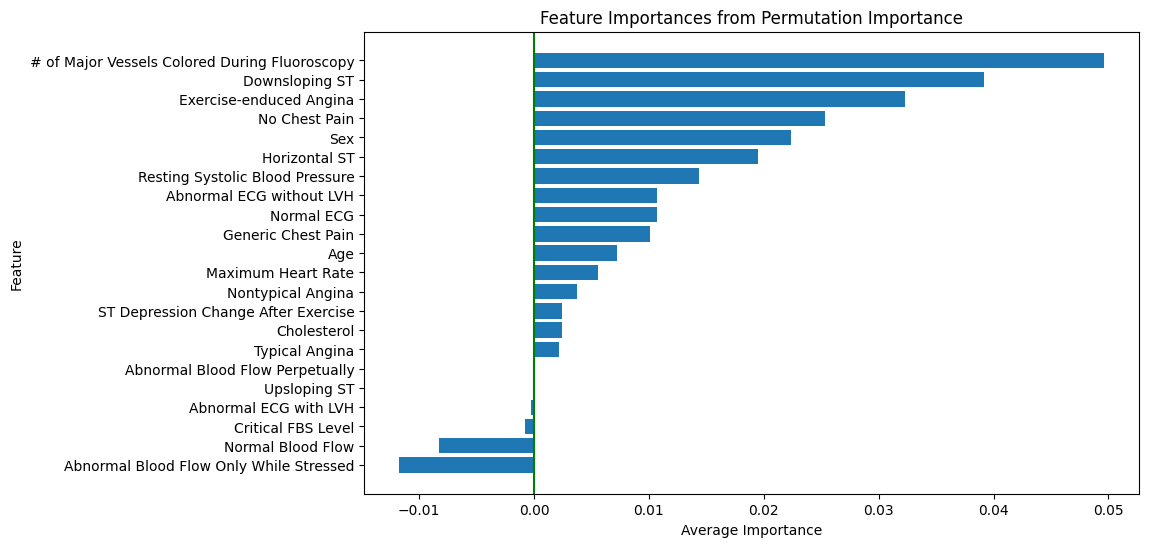

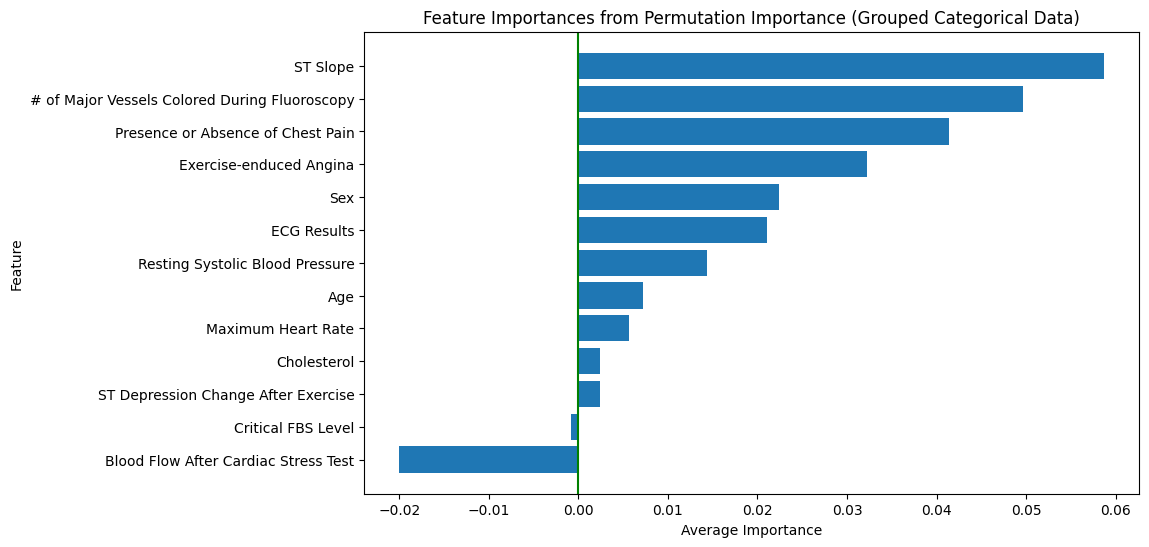

In [47]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), sorted(feature_importances))
plt.ylabel('Feature')
plt.xlabel('Average Importance')
plt.title('Feature Importances from Permutation Importance')
plt.yticks(range(len(feature_importances)), X.columns[np.argsort(feature_importances)[::1]])
plt.axvline(x=0, color='g', linestyle='-')
plt.show()

# Group categorical data for a clearer visual

bloodflow = sum(feature_importances[19:22])
STslope = sum(feature_importances[16:19])
ECGresult = sum(feature_importances[13:16])
chestpainpresence = sum(feature_importances[9:13])
featimp = np.append(feature_importances[0:9], [bloodflow, STslope, ECGresult, chestpainpresence])
Xcolumnnames = np.append(X.columns[0:9], ["Blood Flow After Cardiac Stress Test", "ST Slope", "ECG Results", "Presence or Absence of Chest Pain"])

plt.figure(figsize=(10, 6))
plt.barh(range(len(featimp)), sorted(featimp))
plt.ylabel('Feature')
plt.xlabel('Average Importance')
plt.title('Feature Importances from Permutation Importance (Grouped Categorical Data)')
plt.yticks(range(len(featimp)), Xcolumnnames[np.argsort(featimp)[::1]])
plt.axvline(x=0, color='g', linestyle='-')
plt.show()

The latter graph was created since the first graph may be misleading, since some of the bars are related to one-hot encoded labels. For example, "No Chest Pain" and "General Chest Pain" are both regarded in the graph as fairly important features, but both of these features are mutually exclusive and belonged to the original label "Chest Pain". Since one-hot encoded events are mutually exclusive, we add up all of the related labels' feature importances and assign the sum to the original categorical label before one-hot encoding.  Another thing to note, is that before we did this process, some of our category labels were deemed unimportant. This may mean that some of our categorical labels were unnecessarily diverse, and combining classes may reduce noise (for example: "Abnormal Blood Flow with Left Ventricle Hypertrophy" may be an unnecessary distinction, and perhaps "Abnormal Blood Flow" suffices).

These feature importances were calculated in a simulated manner via sklearn's permuation_importance function, since neural networks do not have a function to directly extract feature importances since their construction is done in a more behind the scenes manner. Increasing the amount of simulations requires an unreasonable runtime, but a low amount of simulations does not let us guarantee that these are accurate feature importances. An alternative option is to check the feature importances of one of our simpler models that provides a function for feature importance. Decision trees and Random Forests have a function to explictly state their feature importances, so we will investigate those.

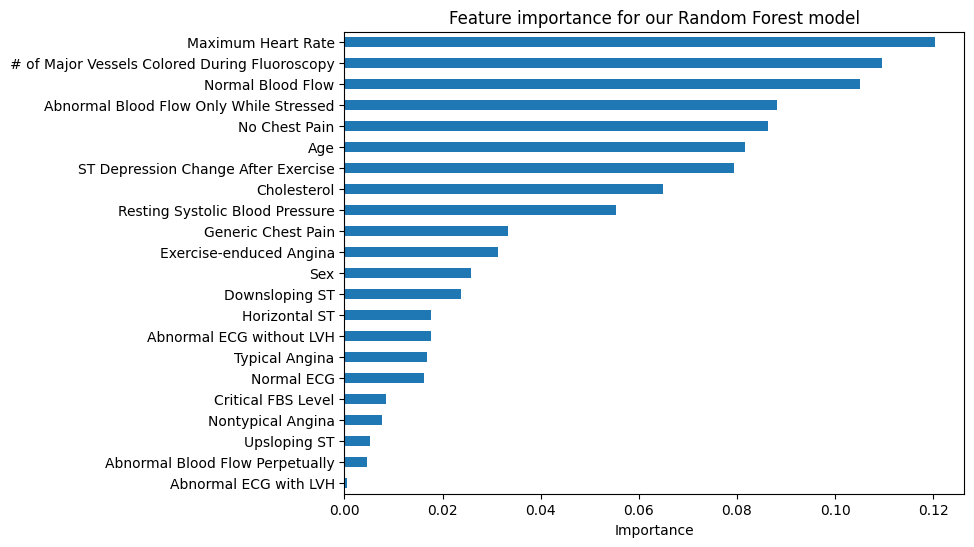

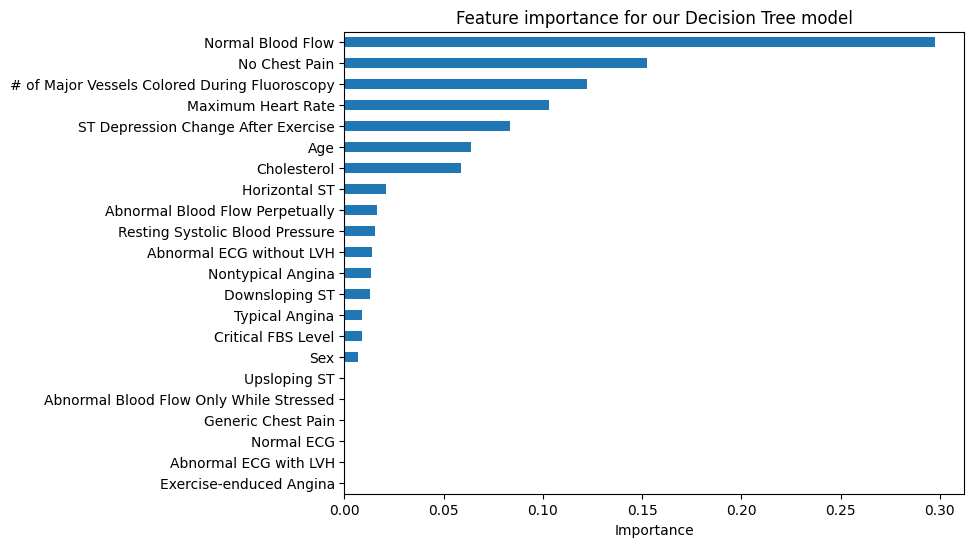

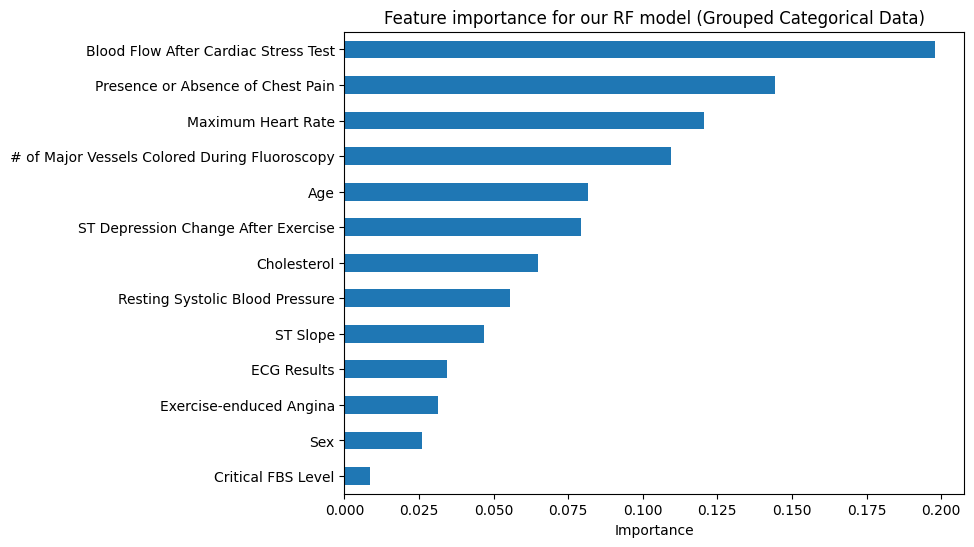

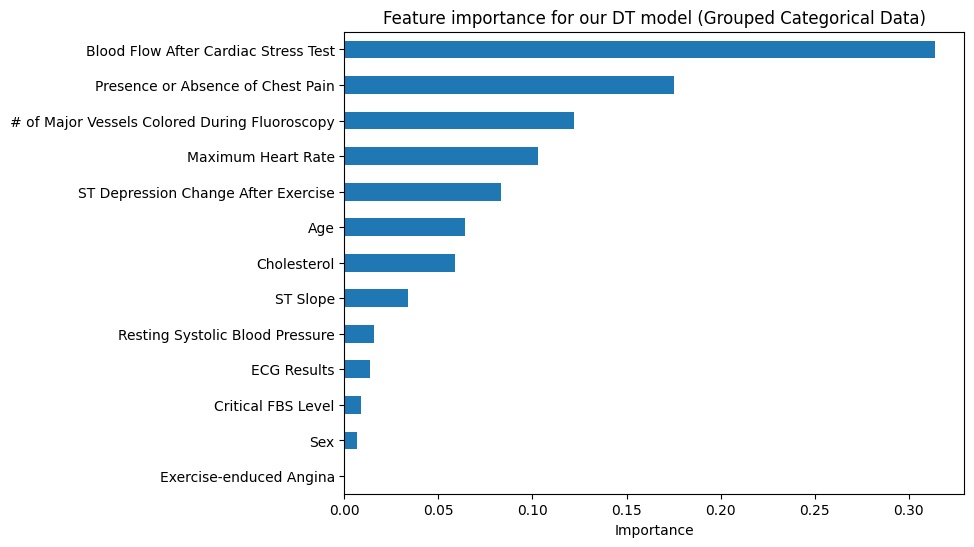

In [48]:
# Initialize the classifier (Random Forest)
clf_randfor = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, random_state=42)

# Train the classifier
clf_randfor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_randfor = clf_randfor.predict(X_test)

# ----------------

# Initialize the classifier (Decision Tree)
clf_dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = clf_dt.predict(X_test)

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# ----------------
plt.rcParams["figure.figsize"] = (11,7)
feat_importances = pd.DataFrame(clf_randfor.feature_importances_, index=X.columns, columns=["Importance"]) # We write a dataframe that contains the feature importances of our data from our model.
feat_importances.sort_values(by='Importance', ascending=True, inplace=True) # Arranging the data from greatest to least
feat_importances.plot(kind='barh', figsize=(8,6), xlabel="Importance", legend=False)
plt.title("Feature importance for our Random Forest model")
plt.show()

plt.rcParams["figure.figsize"] = (11,7)
feat_importances = pd.DataFrame(clf_dt.feature_importances_, index=X.columns, columns=["Importance"]) # We write a dataframe that contains the feature importances of our data from our model.
feat_importances.sort_values(by='Importance', ascending=True, inplace=True) # Arranging the data from greatest to least
feat_importances.plot(kind='barh', figsize=(8,6), xlabel="Importance", legend=False)
plt.title("Feature importance for our Decision Tree model")
plt.show()

print("\n")

# Group categorical data

bloodflowrf = sum(clf_randfor.feature_importances_[19:22])
STsloperf = sum(clf_randfor.feature_importances_[16:19])
ECGresultrf = sum(clf_randfor.feature_importances_[13:16])
chestpainpresencerf = sum(clf_randfor.feature_importances_[9:13])
featimprf = np.append(clf_randfor.feature_importances_[0:9], [bloodflowrf, STsloperf, ECGresultrf, chestpainpresencerf])

bloodflowdt = sum(clf_dt.feature_importances_[19:22])
STslopedt = sum(clf_dt.feature_importances_[16:19])
ECGresultdt = sum(clf_dt.feature_importances_[13:16])
chestpainpresencedt = sum(clf_dt.feature_importances_[9:13])
featimpdt = np.append(clf_dt.feature_importances_[0:9], [bloodflowdt, STslopedt, ECGresultdt, chestpainpresencedt])

plt.rcParams["figure.figsize"] = (11,7)
feat_importances = pd.DataFrame(featimprf, index=Xcolumnnames, columns=["Importance"]) # We write a dataframe that contains the feature importances of our data from our model.
feat_importances.sort_values(by='Importance', ascending=True, inplace=True) # Arranging the data from greatest to least
feat_importances.plot(kind='barh', figsize=(8,6), xlabel="Importance", legend=False)
plt.title("Feature importance for our RF model (Grouped Categorical Data)")
plt.show()

plt.rcParams["figure.figsize"] = (11,7)
feat_importances = pd.DataFrame(featimpdt, index=Xcolumnnames, columns=["Importance"]) # We write a dataframe that contains the feature importances of our data from our model.
feat_importances.sort_values(by='Importance', ascending=True, inplace=True) # Arranging the data from greatest to least
feat_importances.plot(kind='barh', figsize=(8,6), xlabel="Importance", legend=False)
plt.title("Feature importance for our DT model (Grouped Categorical Data)")
plt.show()

We see from our neural network that presence of chest pain is the most important indicator of CAD. This makes sense, since if you are literally experiencing pain in your heart, then it would be reasonable to assume there is something wrong with your heart. The tree models and the neural network also both regarded "# of major vessels colored during a fluoroscopy" as an important feature. This is also reasonable: if you have CAD then you have artery blockage and we would not expect a dye to circulate effectively in your heart. The tree models also indicated cardiac stress blood flow as their most important features, which is essentially the same metric as the fluroscopy coloring, since it is just indicating whether an injected substance is being circulated around a patient's bloodstream. We should probably focus more on the neural network's feature importance decisions, however, since that model was the most effective.

There are a few more intersting things about the NN's feature importances. Cholesterol is not considered an important feature. This may be counterintuitive, since it is fairly common knowledge that cholesterol can cause artery blockages. Upon further inspection, we note that the cholesterol reading is not segregated by high-density lipoprotein and low-density lipoprotein cholesterol ("good" and "bad" cholesterol). HDL cholesterol actually reduces likelihood of heart disease, while LDL is the more commonly known cholesterol that can cause artery blockage. It is possible that people with high cholesterol readings may actually have high HDL readings that balance out their LDL readings. Our dataset could be improved by splitting these cholesterol types into two different features.

Fasting blood sugar levels actually showed *negative* feature importance, which only makes since in the context of our permuation feature importance. This means that our model actually improved when the data for blood sugar was shuffled randomly. This could merely be coincidence and our actual importance should be close to 0 or some small value, our FBS introduces unnecessary noise that complicates our model. We should also note that modern health guidelines do not use the same threshold of blood sugar level to categorize diabetic patients. It is possible that many of our patients had high blood sugar, but not high enough to exhibit what we would now consider diabetic risk, so this is another way our dataset may be improved.

Sex was also a surprisingly important feature. The model (and data) suggested that far more men are going to exhibit CAD. Reserach shows that [this is indeed the case](https://www.medstarhealth.org/blog/heart-disease-men), since women's increased level of estrogen and progesterone improve the health of blood vessels and prevent blockages, meaning artery buildup is less of an issue until a woman is postmenopausal.

These factors are important to note even if our model is not used, for example, a diagnositician may want to keep in mind that a blood sugar reading of 121mg/dL may genuinely be a sign of heart disease, but they should put more focus on something like the patients ECG results to look at their ST slope.

Our dataset may be improved by the addition of more features, including more modern results such as MRI results, but it is understandable that these features in our test are cheap and, aside from the blood tests, non-invasive.

One last thing we should consider about our models, it that their precision metrics (and potentially accuracy) are skewed by the fact that our target class was approximately balanced, yet the prevalence of CAD in the American population is [6.12%](https://www.nhlbi.nih.gov/health/coronary-heart-disease). Recall does not depend on multiple classes, only positive cases, and false positive rate only depends on negative cases, so they are not affected by class imbalance or balance. We will use Bayes theorem to see what our precision would actually be on a random person in the American population by using the proper prevelance of CAD. Let $A$ be the event that our patient has CAD. Let $B$ be the event that our model predicts our patient has CAD.

\begin{align*}
Precision = P(A|B)&=\frac{P(B|A)P(A)}{P(B)} \\
&=\frac{P(B|A)P(A)}{P(B|A)P(A)+P(B|A^{c})P(A^{c})} \\
&= \frac{(0.8857)(0.0612)}{(0.8857)(0.0612)+(0.2)(1-0.0612)} \\
&= {22.40\%} \\
\Rightarrow P(A^c|B) &= 77.60\% \\
\end{align*}

Our model's true precision if we tested on random Americans is 22.40%. This implies that, when our model predicts that a random person has CAD, the model is wrong more than 3 out of 4 times. This model may then be more of an annoyance than a blessing if medical staff began using it to diagnose generic patients, therefore, we should probably only use our model on patients we already suspect may have CAD rather than as a general test.

The neural network model's performance was, as far as most basic machine learning models go, reasonably effective. However, given the ramifications of a false negative, a predictive model in the medical field should ideally have a significantly high recall score, and our 88.57\% is likely insufficient if we were intending to use the model as a replacement for manual diagnosis. The model may work better as a second opinion to validate a doctor's suspicions rather than a test in and of itself.

We are a ways away from using machine learning models to replace doctors' professional opinions. It was heartening to see our amateur models performing better than most people would be able to diagnose heart disease, but it would be unethical to implement this model in its current state without having the model's results verified by a medical professional.
---

Coronary artery disease is a preventable and treatable disease and is the most likely diseases one will end up having, and identifying it so that one can make the necessary adjustments will improve the lifespan and quality of life for an enormous amount of the population.
---


---

# References

https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

https://www.ahajournals.org/doi/10.1161/CIRCULATIONAHA.107.717033

https://professional.heart.org/en/science-news/heart-disease-and-stroke-statistics-2023-update

https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

https://en.wikipedia.org/wiki/Cardiac_stress_test

https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

https://stackoverflow.com/questions/10565868/multi-layer-perceptron-mlp-architecture-criteria-for-choosing-number-of-hidde

https://www.sciencedirect.com/topics/medicine-and-dentistry/st-segment-depression

https://professional.heart.org/en/science-news/heart-disease-and-stroke-statistics-2023-update

https://www.medstarhealth.org/blog/heart-disease-men

https://www.nhlbi.nih.gov/health/coronary-heart-disease
